# 1. Загружаем датасет

In [1]:
import pandas as pd
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!wget https://huggingface.co/datasets/RussianNLP/russian_super_glue/resolve/main/data/DaNetQA.zip

--2024-12-23 10:53:43--  https://huggingface.co/datasets/RussianNLP/russian_super_glue/resolve/main/data/DaNetQA.zip
Resolving huggingface.co (huggingface.co)... 3.168.73.106, 3.168.73.129, 3.168.73.38, ...
Connecting to huggingface.co (huggingface.co)|3.168.73.106|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.hf.co/datasets/russian_super_glue/b5b4bcfe17e1eb16aa13a7aab4ca088871e27b0851468e9a07b9b528bb42fb96?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27DaNetQA.zip%3B+filename%3D%22DaNetQA.zip%22%3B&response-content-type=application%2Fzip&Expires=1735199620&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTczNTE5OTYyMH19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5oZi5jby9kYXRhc2V0cy9ydXNzaWFuX3N1cGVyX2dsdWUvYjViNGJjZmUxN2UxZWIxNmFhMTNhN2FhYjRjYTA4ODg3MWUyN2IwODUxNDY4ZTlhMDdiOWI1MjhiYjQyZmI5Nj9yZXNwb25zZS1jb250ZW50LWRpc3Bvc2l0aW9uPSomcmVzcG9uc2UtY29udGVudC10eXBlPSoifV19&Signature=ajc6S8cFlx

In [3]:
with zipfile.ZipFile("DaNetQA.zip", 'r') as zip_ref:
    zip_ref.extract('DaNetQA/train.jsonl')
    zip_ref.extract('DaNetQA/test.jsonl')
    zip_ref.extract('DaNetQA/val.jsonl')

In [4]:
train_df = pd.read_json('DaNetQA/train.jsonl', lines=True)
test_df = pd.read_json('DaNetQA/test.jsonl', lines=True)
val_df = pd.read_json('DaNetQA/val.jsonl', lines=True)

# 2. EDA

Посмотрим на формат данных каждой из частей датасета.

In [5]:
train_df.head()

,question,passage,label,idx
0,Вднх - это выставочный центр?,«Вы́ставочный центр» — станция Московского мон...,True,0
1,Вднх - это выставочный центр?,"Вы́ставка достиже́ний наро́дного хозя́йства ,...",True,1
2,Был ли джиган в black star?,Вместе с этим треком они выступили на церемони...,True,2
3,Xiaomi конкурент apple?,"Xiaomi — китайская компания, основанная в 2010...",True,3
4,Был ли автомат калашникова в вов?,Отметив некоторые недостатки и в целом удачную...,False,4


In [6]:
test_df.head()

,question,passage,idx
0,Полезна ли ртуть с градусника?,"Отравления ртутью — расстройства здоровья, св...",0
1,Являются ли сапрофаги хищниками?,Фауна лесных почв — совокупность видов животны...,1
2,Водятся ли в индии крокодилы?,"Болотный крокодил, или магер — пресмыкающееся...",2
3,Есть ли в батате крахмал?,"Клубневидно вздутые корни весят до 15 кг, сод...",3
4,Был ли человек в железной маске?,Остров Сент-Маргерит — крупнейший из Лерински...,4


In [7]:
val_df.head()

,question,passage,label,idx
0,Есть ли вода на марсе?,Гидросфера Марса — это совокупность водных зап...,True,0
1,Состоит ли англия в евросоюзе?,В полночь с 31 января на 1 февраля 2020 года п...,False,1
2,Действительно ли в ссср не было адвокатов?,Семён Львович Ария — советский и российский ю...,False,2
3,Была ли чума в оране?,"Чума — это и абсурд, что осмысливается как фор...",True,3
4,Был ли кетчуп в читосе?,Текущий каталог продукции размещен на сайте пр...,True,4


In [8]:
print(train_df.shape)
print(test_df.shape)
print(val_df.shape)

(1749, 4)
(805, 3)
(821, 4)


Можем видеть, что в тест-части датасета нет лейблов, что очень логично в силу того, что этот датасет - публичный бенчмарк.

Теперь посмотрим на распределение True и False в трейне и валидации.

In [9]:
train_df['label'].value_counts()

label
True     1061
False     688
Name: count, dtype: int64

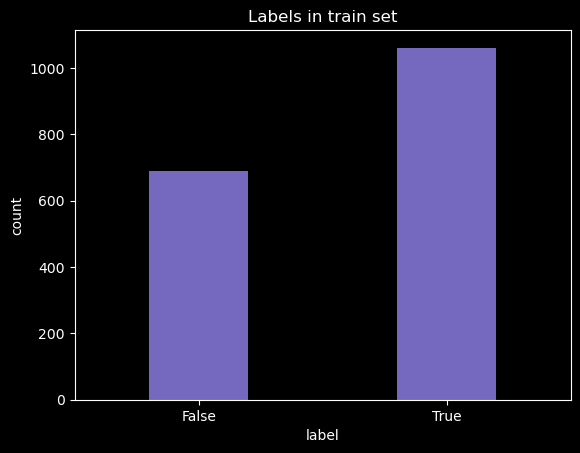

In [10]:
sns.countplot(x='label', data=train_df, color='slateblue', width=0.4)
plt.title('Labels in train set')
plt.show()

In [11]:
val_df['label'].value_counts()

label
True     412
False    409
Name: count, dtype: int64

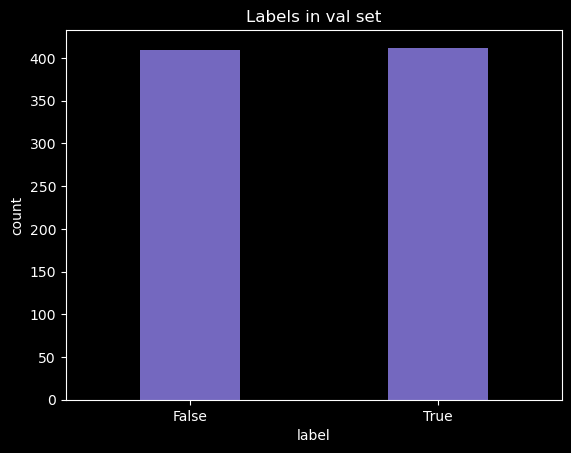

In [12]:
sns.countplot(x='label', data=val_df, color='slateblue', width=0.4)
plt.title('Labels in val set')
plt.show()

Посмотрим на распределение примерного количества слов в вопросах и текстах для трейна и валидации.

In [13]:
train_df['question_word_count'] = train_df['question'].apply(
    lambda x: len(x.split()))
train_df['passage_word_count'] = train_df['passage'].apply(
    lambda x: len(x.split()))

In [14]:
train_df['passage_word_count'].mean()

98.34877072612922

In [15]:
train_df['question_word_count'].mean()

6.519725557461406

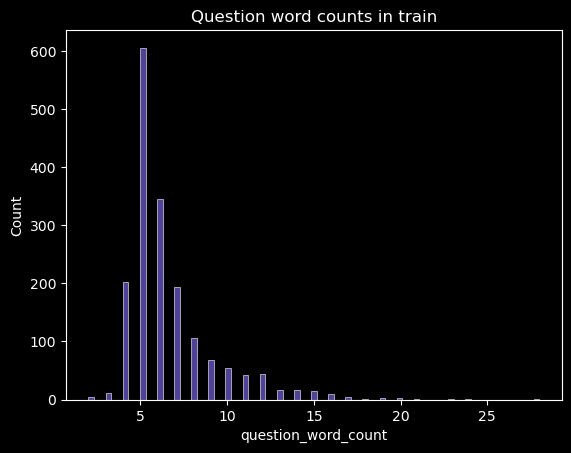

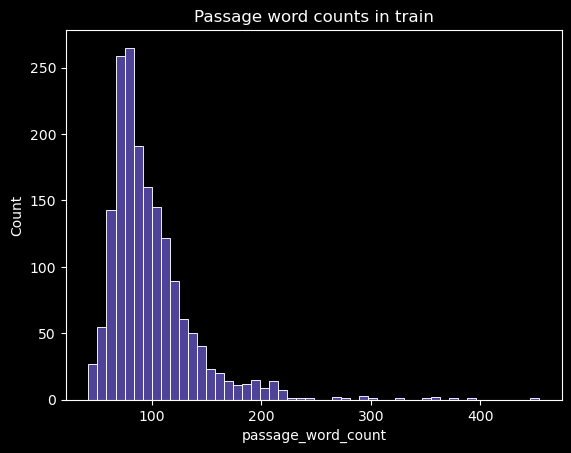

In [16]:
sns.histplot(train_df['question_word_count'], color='slateblue')
plt.title('Question word counts in train')
plt.show()

sns.histplot(train_df['passage_word_count'], bins=50, color='slateblue')
plt.title('Passage word counts in train')
plt.show()

In [17]:
val_df['question_word_count'] = val_df['question'].apply(
    lambda x: len(x.split()))
val_df['passage_word_count'] = val_df['passage'].apply(
    lambda x: len(x.split()))

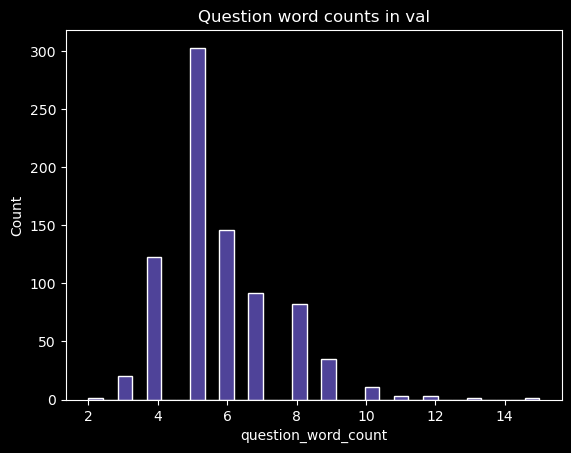

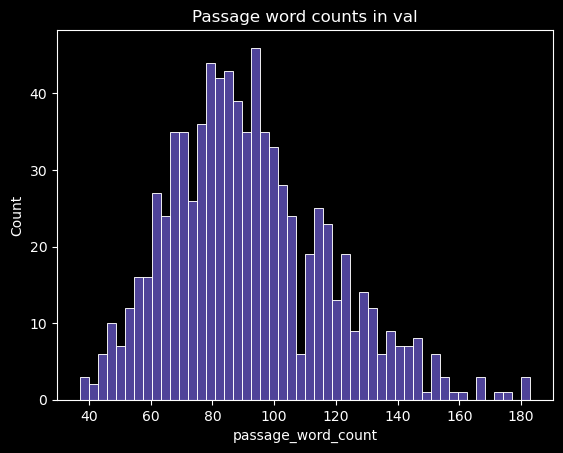

In [18]:
sns.histplot(val_df['question_word_count'], color='slateblue')
plt.title('Question word counts in val')
plt.show()

sns.histplot(val_df['passage_word_count'], bins=50, color='slateblue')
plt.title('Passage word counts in val')
plt.show()

In [19]:
val_df['passage_word_count'].mean()

91.74665042630937

In [20]:
val_df['question_word_count'].mean()

5.806333739342265

In [21]:
# Удаляем колонки с количеством слов в вопросе и параграфе во всех датасетах

train_df.drop(['question_word_count', 'passage_word_count'],
              axis=1, inplace=True)
val_df.drop(['question_word_count', 'passage_word_count'],
            axis=1, inplace=True)

В целом, что можно сказать про наш датасет?

Он является бенчмарком для задачи бинарного QA.

Состав датасета: вопрос ("question"), текст ("passage"), бинарный ответ ("label" в формате "True/False"), индекс строки ("ix").

Размер датасета: 1789 строк в трейне, 805 строк в тесте и 821 строка в валидации.

В трейне наблюдается некоторый дисбаланс лейблов: 1061 True, 688 False;

Это, возможно, может приводить к некоторому байасу в сторону положительных ответов во время предсказаний.

Тексты трейна распределены по длине относительно нормально, средняя длина: 98 слов. В случае валидации распределение несколько менее равномерное, средняя длина: 91 слово.


# 3. Определяемся с выборками и метриками

Поскольку оригинальная тестовая выборка бенчмарка не содержит меток, мы не можем использовать её для оценивания. При этом мы имеем достаточно большую валидационную выборку относительно тренировочной (не многим меньше 50%). Для целей нашего проекта разделим валидационную выборку на две равные части с сохранением пропорций классов, и одну из них будем использовать в качестве валидационной выборки, а другую - в качестве тестовой.

В тренировочной выборке присутствует дисбаланс классов, однако в валидационной и тестовой выборках его не будет - поэтому для нас будут показательны как accuracy, так и F1-метрика и её компоненты - precision и recall.

In [22]:
from sklearn.model_selection import train_test_split

# Создаём новые валидационные и тестовые выборки из оригинальной валидационной

new_val_df, new_test_df = train_test_split(
    val_df,
    test_size=0.5,
    random_state=42,
    stratify=val_df['label']
)

In [23]:
# Проверяем, что дистрибуция классов совпадает с оригинальной
print("Дистрибуция классов в новой валидационной выборке:")
print(new_val_df['label'].value_counts())
print("\nДистрибуция классов в новой тестовой выборке:")
print(new_test_df['label'].value_counts())

Дистрибуция классов в новой валидационной выборке:
label
True     206
False    204
Name: count, dtype: int64

Дистрибуция классов в новой тестовой выборке:
label
True     206
False    205
Name: count, dtype: int64


In [24]:
# Сохраняем финальные выборки в jsonlines

if not os.path.exists('final_data'):
    os.makedirs('final_data')

train_df.to_json(
    'final_data/train.jsonl',
    orient='records',
    lines=True,
    force_ascii=False)
new_val_df.to_json(
    'final_data/val.jsonl',
    orient='records',
    lines=True,
    force_ascii=False)
new_test_df.to_json(
    'final_data/test.jsonl',
    orient='records',
    lines=True,
    force_ascii=False)

# 4. Baseline

В качестве бейзлайна разработчики Russian SuperGLUE использовали TF-IDF и логистическую регрессию ([источник](https://github.com/RussianNLP/RussianSuperGLUE/blob/master/tfidf_baseline/DaNetQA.py)). Нам показалось это хорошим решением в качестве стартовой точки, однако в оригинальном бейзлайне есть моменты, которые нас смутили.

1. Авторы подавали на вход только вопросы и ответы, никак не учитывая текстовые фрагменты, в которых можно было бы найти ответ на вопрос.
2. Авторы никак не предобрабатывали текст, подаваемый в TF-IDF, не проводилась даже лемматизация и удаление стоп-слов.

Кроме того, в авторском бейзлайне используется векторизатор TF-IDF, обученный на всём тренировочном корпусе бенчмарка, а не только на датасете DaNetQA. Мы же в данном проекте ориентируемся не на весь бенчмарк, а исключительно на этот набор данных. Поэтому, вдохновляясь оригиналом, мы немного модифицировали бейзлайн: добавили лемматизацию и удаление стоп-слов, построили TF-IDF с учётом биграмм, а также провели два эксперимента: в первом в качестве объектов использовались только вопросы, а во втором текст, содержащий ответ, конкатинировался с вопросом.

In [56]:
import codecs
import json
import numpy as np
from pymystem3 import Mystem
from nltk.corpus import stopwords
import re
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report


mystem = Mystem()
russian_stopwords = set(stopwords.words("russian"))

In [57]:
def mystem_tokenizer(text):
    # Лемматизируем текст
    lemmas = mystem.lemmatize(text)
    # Возвращаем только алфавитные токены, которых нет в списке стоп-слов
    tokens = [
        token for token in lemmas
        if token.strip() and
        token.isalpha() and
        token not in russian_stopwords
    ]
    return tokens

In [58]:
tfidf_vectorizer = TfidfVectorizer(
    tokenizer=mystem_tokenizer,
    ngram_range=(1, 2)
)

In [59]:
# две функции для считывания данных из файлов
def build_feature_DaNetQA(row):
    res = str(row["question"]).strip()
    label = row.get("label")
    return res, label


def read_data_DaNetQA(path):
    with codecs.open(path, encoding='utf-8-sig') as reader:
        lines = reader.read().split("\n")
        lines = list(map(json.loads, filter(None, lines)))
    res = list(map(build_feature_DaNetQA, lines))
    texts = list(map(lambda x: x[0], res))
    labels = list(map(lambda x: x[1], res))
    ids = [x["idx"] for x in lines]
    return texts, labels, ids


# веторизация tf_idf
def build_features_DaNetQA(path, vect, fit=False):
    texts, labels, ids = read_data_DaNetQA(path)
    if fit:
        features = vect.fit_transform(texts)
    else:
        features = vect.transform(texts)
    return (features, labels), ids


# логистическая регрессия
def fit_DaNetQA(train, labels):
    clf = LogisticRegression(random_state=42)
    return clf.fit(train, labels)


# векторизация считанных данных, обучение логистической регрессии,
# предсказание и оценка качества
def eval_DaNetQA(train_path, val_path, test_path, vectorizer):
    train, train_ids = build_features_DaNetQA(train_path, vectorizer, fit=True)
    val, val_ids = build_features_DaNetQA(val_path, vectorizer, fit=False)
    test, test_ids = build_features_DaNetQA(test_path, vectorizer, fit=False)

    clf = fit_DaNetQA(*train)

    train_pred = clf.predict(train[0])
    val_pred = clf.predict(val[0])
    test_pred = clf.predict(test[0])

    return clf, {
        "train": classification_report(train[1], train_pred),
        "val": classification_report(val[1], val_pred),
        "test": classification_report(test[1], test_pred)
    }

In [60]:
# Обработка данных, оценка результата
_, scores = eval_DaNetQA(
    'final_data/train.jsonl',
    'final_data/val.jsonl',
    'final_data/test.jsonl',
    tfidf_vectorizer
)

# Результаты для каждой выборки
print("Train scores:")
print(scores['train'])
print("\nValidation scores:")
print(scores['val'])
print("\nTest scores:")
print(scores['test'])

/home/futyn/miniconda3/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Train scores:
              precision    recall  f1-score   support

       False       0.99      0.84      0.91       688
        True       0.90      1.00      0.95      1061

    accuracy                           0.93      1749
   macro avg       0.95      0.92      0.93      1749
weighted avg       0.94      0.93      0.93      1749


Validation scores:
              precision    recall  f1-score   support

       False       0.85      0.17      0.28       204
        True       0.54      0.97      0.69       206

    accuracy                           0.57       410
   macro avg       0.70      0.57      0.49       410
weighted avg       0.69      0.57      0.49       410


Test scores:
              precision    recall  f1-score   support

       False       0.79      0.15      0.25       205
        True       0.53      0.96      0.69       206

    accuracy                           0.56       411
   macro avg       0.66      0.56      0.47       411
weighted avg       0.66   

## Объединим тексты и вопросы

Интуитивно кажется, что если в классифицируемом тексте будет информация, которая позволит верно определить ответ, то классификация пройдёт лучше, поэтому перепишим функцию `build_feature_DaNetQA` так, чтобы информационный текст и вопрос конкатинировались в единое целое - именно это мы будем подавать на вход классификатору как объект.

In [61]:
def build_feature_DaNetQA(row):
    res = str(row["question"]).strip() + " " + str(row["passage"]).strip()
    label = row.get("label")
    return res, label

In [62]:
tfidf_vectorizer = TfidfVectorizer(
    tokenizer=mystem_tokenizer,
    ngram_range=(1, 2)
)

In [63]:
_, scores = eval_DaNetQA(
    'final_data/train.jsonl',
    'final_data/val.jsonl',
    'final_data/test.jsonl',
    tfidf_vectorizer
)

print("Train scores:")
print(scores['train'])
print("\nValidation scores:")
print(scores['val'])
print("\nTest scores:")
print(scores['test'])

/home/futyn/miniconda3/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Train scores:
              precision    recall  f1-score   support

       False       0.99      0.77      0.86       688
        True       0.87      0.99      0.93      1061

    accuracy                           0.90      1749
   macro avg       0.93      0.88      0.89      1749
weighted avg       0.92      0.90      0.90      1749


Validation scores:
              precision    recall  f1-score   support

       False       0.93      0.12      0.22       204
        True       0.53      0.99      0.69       206

    accuracy                           0.56       410
   macro avg       0.73      0.56      0.45       410
weighted avg       0.73      0.56      0.46       410


Test scores:
              precision    recall  f1-score   support

       False       0.81      0.08      0.15       205
        True       0.52      0.98      0.68       206

    accuracy                           0.53       411
   macro avg       0.66      0.53      0.41       411
weighted avg       0.66   

Во-первых, стоит сказать, что в обоих экспериментах мы наблюдаем жёсткое переобучение: метрики на тренировочном наборе данных намного выше, чем на тестовом и валидационном. Однако даже по метрикам на тренировочном наборе заметно, что модель чаще склонна говорить "да", даже если ответ на вопрос отрицательный - это видно по метрике recall. На тестовом и валидационном наборах данных "yes-bias" модели совсем критичный: для ответов "да" recall почти стопроцентный, тогда как для "нет" едва ли больше 10%, то есть модель почти всегда говорит "да". Видимо, это происходит из-за дисбаланса данных в тренировочной выборке, где вопросов с правильным утвердительным ответом больше.

Во-вторых, вопреки ожиданиям, добавление дополнительной информации в виде фрагмента текста ухудшило результат. Это можно связать с тем, что логистическая регрессия не способна моделировать логические отношения между текстом и вопросом, да и представление TF-IDF для этого не подходит, потому что не содержит никакой информации о семантике - в итоге когда мы добавляем больше текста, появляется больше шума, а новой информации для обобщения не появляется.

В целом, baseline-модель вообще не выучила никаких закономерностей и получилась почти константной, что говорит о том, что TF-IDF не подходит для моделирования логической связи между вопросом и текстом, в котором этот вопрос содержится, да и логистическая регрессия, видимо, тоже. Для решения задачи стоит задействовать глубокое обучение, как для получения адекватного представления текста, так и для классификации, или, что ещё лучше, перейти от задачи классификации к задаче генерации.